## Data Preparation


In [2]:
# import everything we need first
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

### Loading dataset using Pandas

In [3]:
df = pd.read_csv('xAPI-Edu-Data.csv')

In [4]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


### Viewing the types of different columns. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(4), object(13)
memory usage: 63.8+ KB


### Data Cleaning

#### Formatting of column names

In [6]:
#make the random capitalisations in some of the columns consistent
df.rename(index=str, columns={'gender':'Gender', 'NationalITy':'Nationality',
                               'raisedhands':'RaisedHands', 'VisITedResources':'VisitedResources'},
                               inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 0 to 479
Data columns (total 17 columns):
Gender                      480 non-null object
Nationality                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
RaisedHands                 480 non-null int64
VisitedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(4), object(13)
memory usage: 67.5+ KB


#### Checking for missing data

There are no missing data in the dataset.

In [7]:
df.isnull().sum()

Gender                      0
Nationality                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
RaisedHands                 0
VisitedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

### Data Sampling

In [8]:
df.shape

(480, 17)

#### Checking for imbalanced class distribution 

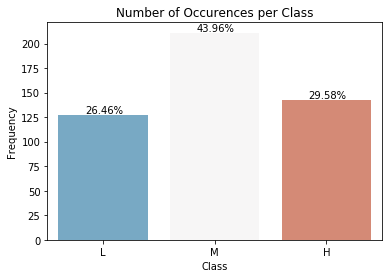

M    211
H    142
L    127
Name: Class, dtype: int64

In [9]:
frequency = sns.countplot(x='Class', data=df, order=['L', 'M', 'H'], palette='RdBu_r')
for p in frequency.patches:
    frequency.annotate('{:.2f}%'.format((p.get_height() * 100) / len(df)), (p.get_x() + 0.24, p.get_height() + 2))
frequency.set(xlabel='Class', ylabel='Frequency', title='Number of Occurences per Class')
plt.show()
df['Class'].value_counts()

#### Data Balancing

Since there are much more samples of the middle-level class than the other classes, an under-sampling approach is used to decrease the skewed distribution by reducing the number of samples of the majority class.

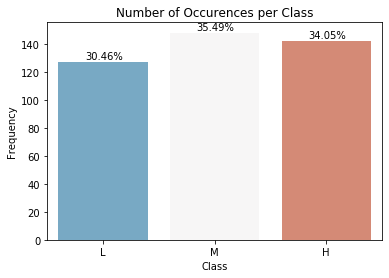

M    148
H    142
L    127
Name: Class, dtype: int64

In [10]:
# we will randomly take 70% from class M as samples to balance the data.
df = df.drop(df.query("Class == 'M'").sample(frac = 0.3).index)
frequency = sns.countplot(x='Class', data=df, order=['L', 'M', 'H'], palette='RdBu_r')
for p in frequency.patches:
    frequency.annotate('{:.2f}%'.format((p.get_height() * 100) / len(df)), (p.get_x() + 0.24, p.get_height() + 2))
frequency.set(xlabel='Class', ylabel='Frequency', title='Number of Occurences per Class')
plt.show()
df['Class'].value_counts()

### Binning
Binning/Converting Numerical RaisedHands to Categorical Variable


Feature vector map:

RaisedHands <= 50: 0  
RaisedHands > 50: 1  


In [10]:
# make a copy of the dataframe
df_cat = df
df_cat.loc[ df['RaisedHands'] <= 50, 'RaisedHands'] = 0,
df_cat.loc[ df['RaisedHands'] > 50, 'RaisedHands'] = 1
df

,Gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0,25,5,35,No,Bad,Above-7,L
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,0,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,0,10,15,22,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,1,80,25,70,Yes,Good,Under-7,M
10,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,0,88,30,80,Yes,Good,Under-7,H
11,M,KW,KuwaIT,MiddleSchool,G-07,B,Math,F,Father,0,6,19,12,Yes,Good,Under-7,M
12,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0,1,0,11,No,Bad,Above-7,L


#### Combine levels in GradeID feature as per the insights gained from the Exploratory Data Analysis

GradeID map



G-02 : 0  
G-04, G-05, G-06, G-07, G-08 : 1  
G-09, G-10, G-11, G-12 : 2  

In [11]:
gradeID_mapping = {"G-02": 0,
                 "G-04": 1, "G-05": 1, "G-06": 1, "G-07": 1, "G-08": 1,
                 "G-09": 2, "G-10": 2, "G-11": 2, "G-12": 2 }
df['GradeID'] = df['GradeID'].map(gradeID_mapping)

In [12]:
df['GradeID'].value_counts()

1    254
0    132
2     31
Name: GradeID, dtype: int64

####  Combine levels in Topic feature as per the insights gained from the Exploratory Data Analysis
Topic map

IT : 0  
Math & Sciences {Math, Science, Biology, Chemistry} : 1  
Languages {Arabic, English, Quran, Spanish, French} : 2  
Humanities {History, Geology} : 3

In [13]:
topic_mapping = {"IT": 0,
                 "Math": 1, "Science": 1, "Biology": 1, "Chemistry": 1,
                 "Arabic": 2, "English": 2, "Quran": 2, "Spanish": 2, "French": 2,
                  "History": 3, "Geology": 3}
df['Topic'] = df['Topic'].map(topic_mapping)

In [14]:
df['Topic'].value_counts()

2    186
1    116
0     84
3     31
Name: Topic, dtype: int64

### Categorical Data: Label Encoding

In [16]:
df

,Gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
1,M,KW,KuwaIT,lowerlevel,1,A,0,F,Father,0,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,1,A,0,F,Father,0,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,1,A,0,F,Father,0,25,5,35,No,Bad,Above-7,L
5,F,KW,KuwaIT,lowerlevel,1,A,0,F,Father,0,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,1,A,1,F,Father,0,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,1,A,1,F,Father,0,10,15,22,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,1,B,0,F,Father,1,80,25,70,Yes,Good,Under-7,M
10,M,KW,KuwaIT,MiddleSchool,1,A,1,F,Father,0,88,30,80,Yes,Good,Under-7,H
11,M,KW,KuwaIT,MiddleSchool,1,B,1,F,Father,0,6,19,12,Yes,Good,Under-7,M
12,M,KW,KuwaIT,lowerlevel,1,A,0,F,Father,0,1,0,11,No,Bad,Above-7,L


In [17]:
from sklearn.preprocessing import LabelEncoder

X = df.drop('Class', axis=1)
y = df['Class']

# Encoding the categorical features
labelEncoder = LabelEncoder()
cat_columns = X.dtypes.pipe(lambda x: x[x == 'object']).index
for col in cat_columns:
    X[col] = labelEncoder.fit_transform(X[col])
    


In [22]:
X.head(50)

,Gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
1,1,4,4,2,1,0,0,0,0,0,20,3,25,1,1,1
2,1,4,4,2,1,0,0,0,0,0,7,0,30,0,0,0
3,1,4,4,2,1,0,0,0,0,0,25,5,35,0,0,0
5,0,4,4,2,1,0,0,0,0,0,30,13,70,1,0,0
6,1,4,4,1,1,0,1,0,0,0,12,0,17,0,0,0
7,1,4,4,1,1,0,1,0,0,0,10,15,22,1,1,1
9,0,4,4,1,1,1,0,0,0,1,80,25,70,1,1,1
10,1,4,4,1,1,0,1,0,0,0,88,30,80,1,1,1
11,1,4,4,1,1,1,1,0,0,0,6,19,12,1,1,1
12,1,4,4,2,1,0,0,0,0,0,1,0,11,0,0,0


In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 1 to 479
Data columns (total 16 columns):
Gender                      417 non-null int32
Nationality                 417 non-null int32
PlaceofBirth                417 non-null int32
StageID                     417 non-null int32
GradeID                     417 non-null int64
SectionID                   417 non-null int32
Topic                       417 non-null int64
Semester                    417 non-null int32
Relation                    417 non-null int32
RaisedHands                 417 non-null int64
VisitedResources            417 non-null int64
AnnouncementsView           417 non-null int64
Discussion                  417 non-null int64
ParentAnsweringSurvey       417 non-null int32
ParentschoolSatisfaction    417 non-null int32
StudentAbsenceDays          417 non-null int32
dtypes: int32(10), int64(6)
memory usage: 39.1+ KB
